In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import modal
import seaborn as sns
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('titanic.csv')
#titanic=训练集
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
#可以drop的
train = train.drop(['Ticket'], axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [4]:
#处理数据
#查看cabin分布，有信息=1，无=0
train.Cabin.value_counts()


C23 C25 C27    4
G6             4
B96 B98        4
E101           3
C22 C26        3
              ..
D11            1
C90            1
B41            1
E17            1
C111           1
Name: Cabin, Length: 147, dtype: int64

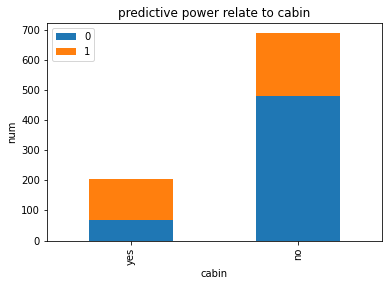

In [5]:
#调查cabin的predictive power
Survived_cabin = train.Survived[pd.notnull(train.Cabin)].value_counts()
Survived_nocabin = train.Survived[pd.isnull(train.Cabin)].value_counts()
df=pd.DataFrame({u'yes':Survived_cabin, u'no':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"predictive power relate to cabin")
plt.xlabel(u"cabin") 
plt.ylabel(u"num")
plt.show()



In [6]:
#有关，有cabin更容易存活 

train.loc[ (train.Cabin.notnull()), 'Cabin' ] = "Yes"
train.loc[ (train.Cabin.isnull()), 'Cabin' ] = "No"



#要是无关
#train = train.drop(['Cabin'], axis=1)
#train = train.dropna() 
#train.info()

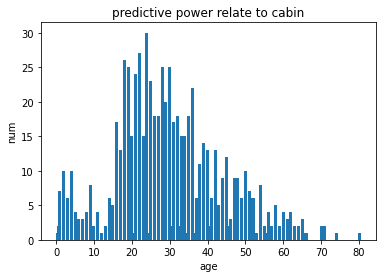

In [7]:
#age处理
plt.bar(train['Age'].value_counts().index,train['Age'].value_counts().values)
plt.title("predictive power relate to cabin")
plt.xlabel("age")
plt.ylabel("num")
plt.show()

In [8]:
#丢失的年龄可能会跟title有关，比如ms和mrs区别
for i in train:
    train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [9]:
pd.crosstab(train.Title,train.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [10]:
#替换
train['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [11]:
# 按照分组来求平均年龄
train.groupby('Title')['Age'].mean()

Title
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [12]:
## 使用每组的均值来进行填充缺失值
train.loc[(train.Age.isnull())&(train.Title=='Mr'),'Age']=33
train.loc[(train.Age.isnull())&(train.Title=='Mrs'),'Age']=36
train.loc[(train.Age.isnull())&(train.Title=='Master'),'Age']=5
train.loc[(train.Age.isnull())&(train.Title=='Miss'),'Age']=22
train.loc[(train.Age.isnull())&(train.Title=='Other'),'Age']=46

c:\users\程紫瑜\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
c:\users\程紫瑜\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


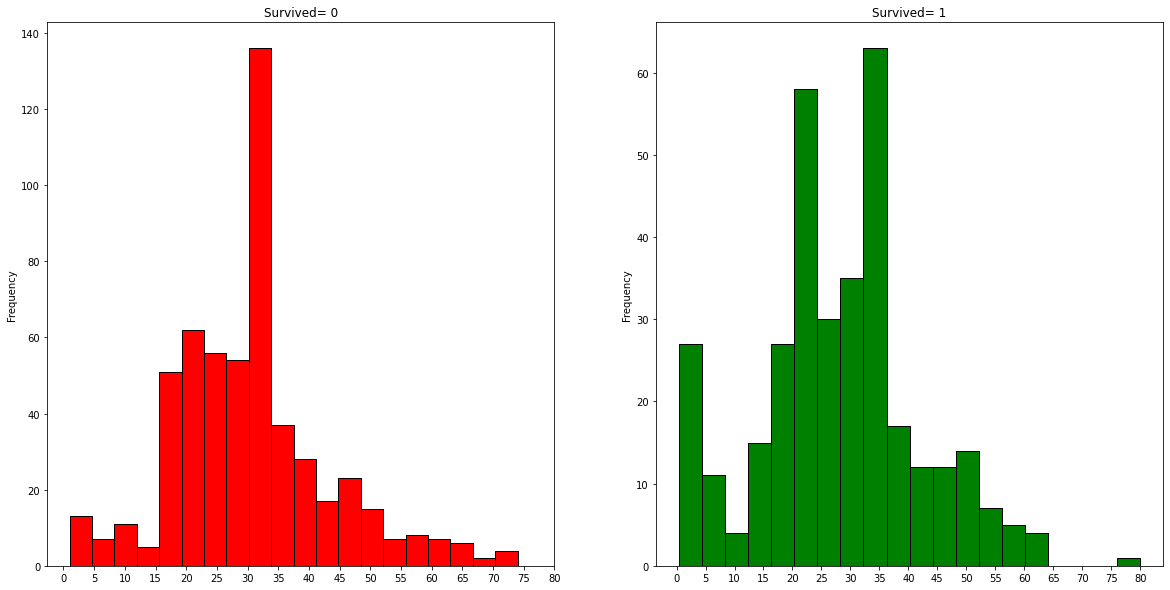

In [13]:
#结果
train.Age.isnull().any()
f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train[train['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

In [14]:
#sns.factorplot('Pclass','Survived',col='Title',train=train)
#plt.show()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
dummies_Cabin = pd.get_dummies(train['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(train['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(train['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(train['Pclass'], prefix= 'Pclass')



In [16]:
df

ERROR! Session/line number was not unique in database. History logging moved to new session 184


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,...,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,No,...,1,0,0,0,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,Yes,...,0,1,1,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,No,...,1,0,0,0,1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,Yes,...,0,1,0,0,1,1,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,No,...,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,No,...,1,0,0,0,1,0,1,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,Yes,...,0,1,0,0,1,1,0,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,23.4500,No,...,1,0,0,0,1,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,Yes,...,0,1,1,0,0,0,1,1,0,0


In [19]:
df = pd.concat([train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Cabin','Title', 'Embarked'], axis=1, inplace=True)

In [20]:
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,1,0,0,0,1,0,1,0,1,0
887,888,1,19.0,0,0,30.0000,0,1,0,0,1,1,0,1,0,0
888,889,0,22.0,1,2,23.4500,1,0,0,0,1,1,0,0,0,1
889,890,1,26.0,0,0,30.0000,0,1,1,0,0,0,1,1,0,0


In [22]:
df.to_csv('titanicnew', encoding='utf-8_sig')